<a href="https://colab.research.google.com/github/aldadobi/Spatial-transcriptomics-with-breast-tissue/blob/main/test_flip11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/biomed-AI/Hist2ST.git

Cloning into 'Hist2ST'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 64 (delta 29), reused 36 (delta 9), pack-reused 0
Receiving objects: 100% (64/64), 410.55 KiB | 3.31 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
%cd Hist2ST
!ls

/content/Hist2ST
data	    graph_construction.py  NB_module.py  run_trained_models.ipynb  utils.py
dataset.py  HIST2ST.py		   predict.py	 transformer.py		   Workflow.png
gcn.py	    HIST2ST_train.py	   README.md	 tutorial.ipynb


In [ ]:
!pip install torch scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=30829e3bf42baf8da7ad87eb4252f63b57ea3bb6bd77b6f2087ebbffb2b0ef65
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=694bcb4f59ec8b7c667eb094da2b70b89ae2b39d0ec75485f03a56f00335baf6
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd

In [ ]:
!pip install easydl

  Preparing metadata (setup.py) ... done
  Created wheel for easydl: filename=easydl-2.2.0-py3-none-any.whl size=20178 sha256=af869252c173c62c369b655bb9346543803f57b9b2c6a3b7cd6686dee316603d
  Stored in directory: /root/.cache/pip/wheels/c4/ee/2f/74e732a6df6bf01c83b3b9bf215695f6f21e46c4cf52489df6
Successfully built easydl


In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 35.5 MB/s eta 0:00:00


In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 904.5 kB/s eta 0:00:00


In [ ]:
!pip install sh

In [ ]:
!pip install scprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import pandas as pd
from PIL import Image
import os
import glob
from collections.abc import Iterable
from sh import gunzip
from torchvision import transforms
import pytorch_lightning as pl
import torchvision.transforms as tf

from tqdm import tqdm
from predict import *
# error -> utils.py -> collections.abc
from HIST2ST import *
from dataset import ViT_HER2ST, ViT_SKIN
from scipy.stats import pearsonr,spearmanr
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger
from copy import deepcopy as dcp
from collections import defaultdict as dfd
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score

In [ ]:
os.system('/content/Hist2ST/data/download.sh')

32256

In [ ]:
%cd /content/Hist2ST/data

/content/Hist2ST/data


In [ ]:
!git clone https://github.com/almaan/her2st.git

Cloning into 'her2st'...
remote: Enumerating objects: 1041, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1041 (delta 24), reused 40 (delta 12), pack-reused 983
Receiving objects: 100% (1041/1041), 1.05 GiB | 40.43 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Updating files: 100% (395/395), done.


In [ ]:
%cd /content/Hist2ST

/content/Hist2ST


In [ ]:
for file_path in glob.glob(os.path.join('/content/Hist2ST/data/her2st/data/ST-cnts', '*.gz')):
  gunzip(file_path)
  print(f"Unzipped: {os.path.basename(file_path)}")

Unzipped: B1.tsv.gz
Unzipped: C4.tsv.gz
Unzipped: H3.tsv.gz
Unzipped: C2.tsv.gz
Unzipped: G1.tsv.gz
Unzipped: G3.tsv.gz
Unzipped: C1.tsv.gz
Unzipped: C5.tsv.gz
Unzipped: E3.tsv.gz
Unzipped: B5.tsv.gz
Unzipped: D4.tsv.gz
Unzipped: D5.tsv.gz
Unzipped: G2.tsv.gz
Unzipped: A3.tsv.gz
Unzipped: F1.tsv.gz
Unzipped: E1.tsv.gz
Unzipped: D2.tsv.gz
Unzipped: E2.tsv.gz
Unzipped: H2.tsv.gz
Unzipped: B6.tsv.gz
Unzipped: A2.tsv.gz
Unzipped: D1.tsv.gz
Unzipped: A6.tsv.gz
Unzipped: H1.tsv.gz
Unzipped: F3.tsv.gz
Unzipped: B4.tsv.gz
Unzipped: A1.tsv.gz
Unzipped: A5.tsv.gz
Unzipped: B3.tsv.gz
Unzipped: F2.tsv.gz
Unzipped: B2.tsv.gz
Unzipped: A4.tsv.gz
Unzipped: D3.tsv.gz
Unzipped: D6.tsv.gz
Unzipped: C6.tsv.gz
Unzipped: C3.tsv.gz


In [ ]:
name=[*[f'A{i}' for i in range(2,7)],*[f'B{i}' for i in range(1,7)],
      *[f'C{i}' for i in range(1,7)],*[f'D{i}' for i in range(1,7)],
      *[f'E{i}' for i in range(1,4)],*[f'F{i}' for i in range(1,4)],*[f'G{i}' for i in range(1,4)]]
patients = ['P2', 'P5', 'P9', 'P10']
reps = ['rep1', 'rep2', 'rep3']
skinname = []
for i in patients:
    for j in reps:
        skinname.append(i+'_ST_'+j)
device='cuda'
tag='5-7-2-8-4-16-32'
k,p,d1,d2,d3,h,c=map(lambda x:int(x),tag.split('-'))
dropout=0.2
random.seed(2000)
np.random.seed(2000)
torch.manual_seed(2000)
torch.cuda.manual_seed(2000)
torch.cuda.manual_seed_all(2000)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [ ]:
fold=5
data='her2st'
prune='Grid' if data=='her2st' else 'NA'
genes=171 if data=='cscc' else 785

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pretrained check point 불러오기
testset = pk_load(23,'test',dataset=data,flatten=False,adj=True,ori=True,prune=prune)
test_loader = DataLoader(testset, batch_size=1, num_workers=0, shuffle=False)
label=testset.label[testset.names[0]]
genes=785
model=Hist2ST(
    depth1=d1, depth2=d2,depth3=d3,n_genes=genes,
    kernel_size=k, patch_size=p,
    heads=h, channel=c, dropout=0.2,
    zinb=0.25, nb=False,
    bake=5, lamb=0.5,
)
model.load_state_dict(torch.load('/content/drive/MyDrive/breast_ST/5-Hist2ST.ckpt'))
pred, gt = test(model, test_loader,'cuda')


['E1']
Loading imgs...
Loading metadata...


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Pearson Correlation: 0.11376480414520439
ARI: 0.003


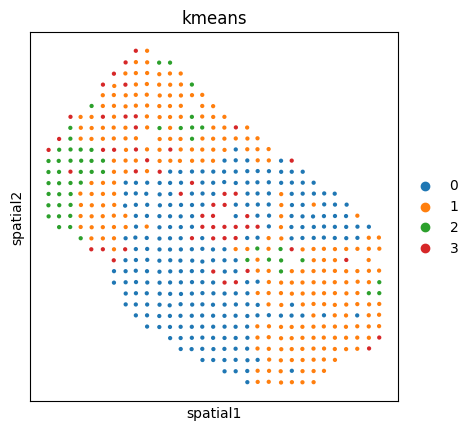

In [ ]:
# Prediction -> Clustering 시각화
R=get_R(pred,gt)[0]
print('Pearson Correlation:',np.nanmean(R))

clus,ARI=cluster(pred,label)
print('ARI:',ARI)

sc.pl.spatial(pred, img=None, color='kmeans', spot_size=112)

ARI: 0.037


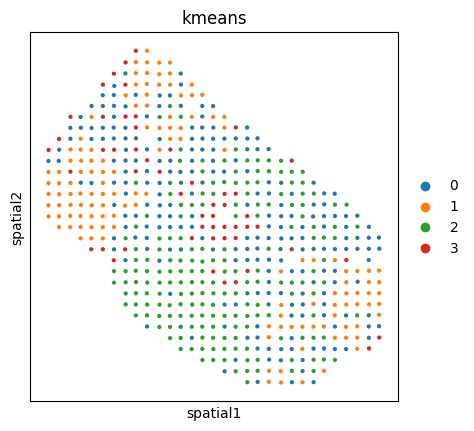

In [ ]:
# Ground Truth 시각화
adata_gt = ad.AnnData(gt)

clus_gt,ARI=cluster(adata_gt,label)
print('ARI:',ARI)

sc.pl.spatial(adata_gt, img=None, color='kmeans', spot_size=112)

In [ ]:
# Cluster 예측 정확도
from sklearn.metrics import accuracy_score

clus_gt,ARI=cluster(adata_gt,label)
clus_pred,ARI=cluster(pred,label)

cluster_mapping = {'0': '1', '1': '2', '2': '0', '3':'3'}
new_cluster_labels = np.array([cluster_mapping[label] for label in clus_gt])

accuracy = accuracy_score(new_cluster_labels, clus_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5936329588014981


In [ ]:
# Gene Prediction -> Cell Type Prediction Accuracy
gt_df = gt.to_df()
pred_df = pred.to_df()
gt_gene = gt.obs['most_expressed_gene'] = gt_df.idxmax(axis=1)
pred_gene = pred.obs['most_expressed_gene'] = pred_df.idxmax(axis=1)

gene_list = np.load('/content/Hist2ST/data/her_hvg_cut_1000.npy')


label_df = pd.DataFrame(label, columns=['CellType'])
label_df['SpotNumber'] = label_df.index

gt_gene_df = gt_gene.reset_index().rename(columns={'index': 'SpotNumber', 0: 'GeneNumber'})
gt_gene_df['SpotNumber'] = gt_gene_df['SpotNumber'].astype(int)

value_counts = gt_gene_df['GeneNumber'].value_counts()

print('count', len(value_counts))

merged_df = pd.merge(label_df, gt_gene_df, on='SpotNumber')

gene_to_cell_type = dict(zip(merged_df['GeneNumber'], merged_df['CellType']))

print(len(gene_to_cell_type))

pred_gene_df = pred_gene.reset_index().rename(columns={'index': 'SpotNumber', 0: 'GeneNumber'})
pred_gene_df['CellType'] = pred_gene_df['GeneNumber'].map(gene_to_cell_type)

gt_gene_df['MappedCellType'] = gt_gene_df['GeneNumber'].map(gene_to_cell_type)

accuracy = (pred_gene_df['CellType'] == gt_gene_df['MappedCellType']).mean()

print(f"Accuracy: {accuracy}")

print(pred_gene)
print(type(gt_gene))
accuracy = np.mean(gt_gene == pred_gene)
print(f"Accuracy: {accuracy * 100:.2f}%")


count 4
4
Accuracy: 0.9829642248722317
0      60
1      60
2      60
3      60
4      60
       ..
582    60
583    60
584    60
585    60
586    60
Length: 587, dtype: object
<class 'pandas.core.series.Series'>
Accuracy: 56.56%


In [ ]:
from sklearn.metrics import accuracy_score

R, P=get_R(pred,gt)
print('Pearson Correlation:',np.nanmean(R))



adata_gt = ad.AnnData(gt)
print(clus_gt)

label_gt = label
clus_gt,ARI=cluster(adata_gt,label_gt)

cluster_mapping = {'0': '2', '1': '3', '2': '1', '3':'0', '4':'4'}

new_cluster_labels = np.array([cluster_mapping[label] for label in clus_gt])

label_pr = label
clus_pred,ARI=cluster(pred,label_pr)


def compute_accuracy(gt, pred):

  accuracy = accuracy_score(gt, pred)

  return accuracy

accuracy = np.mean(R == P)
print(f"Accuracy: {accuracy * 100:.2f}%")



clus,ARI=cluster(pred,label)
print('ARI:',ARI)

print(len(label))
type(pred.obs['kmeans'])


In [ ]:

import pandas as pd
from collections import Counter

# Assuming cluster_num is a pandas Series with a multi-level index or tuples
# where the first level/index or element is the spot number and the second is the cluster kind.
# cell_names is a list of cell names corresponding to each spot.

cluster_num = pred.obs['kmeans']
cell_names = label
# Validate the length of cell_names
if len(cell_names) != len(cluster_num):
    raise ValueError("The length of cell_names does not match the length of cluster_num")

# Step 1: Create a DataFrame that combines cluster information with cell names
df = pd.DataFrame({
    'spot_number': cluster_num.index.get_level_values(0) if cluster_num.index.nlevels > 1 else range(len(cluster_num)),
    'cluster_kind': cluster_num.values,
    'cell_name': cell_names
})

# Step 2: Determine the most and second most expressed cell type for each cluster
def most_common_cells(cluster_df):
    count = Counter(cluster_df)
    most_common = count.most_common(2)
    return most_common[0][0], most_common[1][0] if len(most_common) > 1 else None

cluster_info_series = df.groupby('cluster_kind')['cell_name'].apply(most_common_cells)

# Convert the Series to a DataFrame
cluster_info = pd.DataFrame(cluster_info_series.tolist(), index=cluster_info_series.index).reset_index()
cluster_info.columns = ['cluster_kind', 'most_expressed', 'second_most_expressed']

# Step 3: Handle 'undetermined' cases and resolve name conflicts
def resolve_cluster_names(cluster_info):
    cluster_names = {}
    for _, row in cluster_info.iterrows():
        cluster = row['cluster_kind']
        name = row['most_expressed']
        second_name = row['second_most_expressed']

        if name == 'undetermined' and second_name:
            name = second_name

        if name in cluster_names:
            # Compare percentages and resolve conflict
            current_percentage = (df[df['cluster_kind'] == cluster]['cell_name'] == name).sum() / len(df)
            existing_percentage = cluster_names[name]['percentage']

            if current_percentage > existing_percentage:
                cluster_names[name] = {'cluster': cluster, 'percentage': current_percentage}
                name = second_name
            else:
                continue

        cluster_names[name] = {'cluster': cluster, 'percentage': (df[df['cluster_kind'] == cluster]['cell_name'] == name).sum() / len(df)}

    return cluster_names

final_clusters = resolve_cluster_names(cluster_info)

# final_clusters now contains the resolved cluster names

print(final_clusters)

In [ ]:
adata_gt = ad.AnnData(gt)

clus_gt,ARI=cluster(adata_gt,label)
print('ARI:',ARI)

sc.pl.spatial(adata_gt, img=None, color='kmeans', spot_size=112)